### Imports:

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import math
import pandas as pd
import gas_structure_module as gs
from os import path

### Here is the analytical form of the Galctic rotation curve from Clemons 1985 (R should be given in kpc):

In [15]:
#define solar values:
R_0 = 8.5 #kpc
V_0 = 220 #km/s

def Clemons(R):

    #define coefficients and number of terms for different radial boundaries:
    R_A = np.array([1, R, R**2, R**3, R**4, R**5, R**6])
    A = np.array([0, 3069.81, -15809.8, 43980.1, -68287.3, 54904, -17731])

    R_B = np.array([1, R, R**2, R**3, R**4, R**5])
    B = np.array([325.0912, -248.1467, 231.87099, -110.73531, 25.073006, -2.110625])

    R_C = np.array([1, R, R**2, R**3, R**4, R**5, R**6, R**7])
    C = np.array([-2342.6564, 2507.60391, -1024.068760, 224.562732, -28.4080026, 2.0697271, -0.08050808, 0.00129348])

    #define piece-wise function:
    if R < 0.09*R_0:
        return np.sum(A*R_A)

    if 0.09*R_0 < R < 0.45*R_0:
        return np.sum(B*R_B)

    if 0.45*R_0 < R < 1.6*R_0:
        return np.sum(C*R_C)

    if R > 1.6*R_0:
        return 234.88

### Now plot:

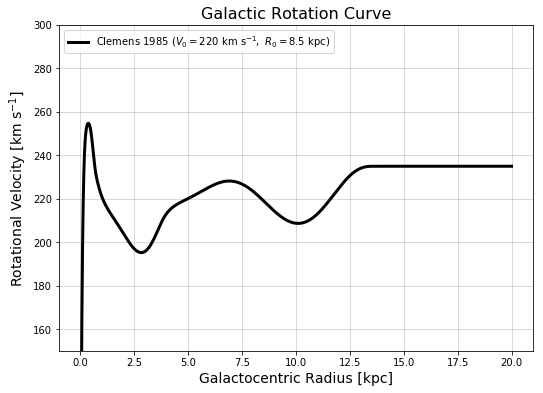

In [19]:
r_list = np.arange(0.01,20,0.01)
v_list = []

for each in r_list:
    v_list.append(Clemons(each))

#plot Galactic rotation curve:

fig = plt.figure(figsize=(8.5,6))

plt.plot(r_list,v_list,ls="-",lw=3,color="black",label="Clemens 1985 ($V_0 = 220 \mathrm{\ km \ s^{-1}}, \ R_0 = 8.5 \  \mathrm{kpc}$)")

plt.title("Galactic Rotation Curve",fontsize=16)
plt.xlabel("Galactocentric Radius [kpc]",fontsize=14)
plt.ylabel("Rotational Velocity [$\mathrm{km \ s^{-1}}$]",fontsize=14)
plt.ylim(150,300)
plt.legend(loc=2,frameon=True)
plt.grid(ls="-",alpha=0.6)
plt.savefig("Galactic_rotational_curve.pdf")
plt.show()
plt.close()

### Now define the local standard of rest velocity:

In [17]:
def V_LSR(R,l):
        return ((R_0/R)*Clemons(R) - V_0)*math.sin(l)

# Now plot:

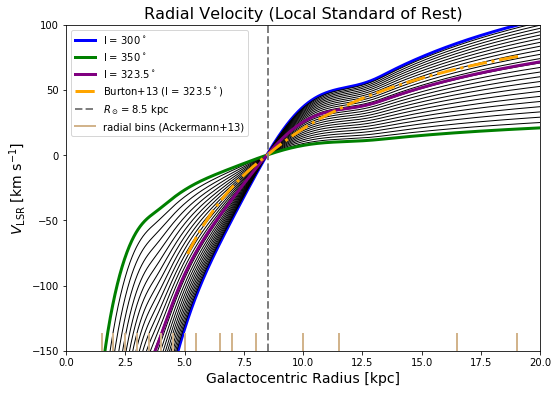

In [18]:
l = 323.5 * (math.pi/180) #radian degree
l_range = np.arange(300,352,2)
test_case=np.array([323.5])
l_range = np.append(l_range,test_case)

fig = plt.figure(figsize=(8.5,6))

for each in l_range:

    l = each * (math.pi/180) #radian degree

    v_lsr_list = []
    for every in r_list:
        v_lsr_list.append(V_LSR(every,l))

    #plot Galactic rotation curve:
    if each == 300:
        plt.plot(r_list,v_lsr_list,ls="-",lw=3,color="blue",label="l = $300^\circ$")

    if each == 350:
        plt.plot(r_list,v_lsr_list,ls="-",lw=3,color="green",label="l = $350^\circ$")

    if each == 323.5:
        plt.plot(r_list,v_lsr_list,ls="-",lw=3,color="purple",label="l = $323.5^\circ$")

    if each not in [300,350,323.5]:
        plt.plot(r_list,v_lsr_list,ls="-",lw=1,color="black")

        #overlay result from Burton+13:
df = pd.read_csv("Burton_2013.txt",delim_whitespace=True,names=["radius","velocity"])
B_rad = df["radius"]
B_vel = df["velocity"]
plt.plot(B_rad,B_vel,ls="-.",lw=3,color="orange",label="Burton+13 (l = $323.5^\circ$)")

#plot solar radius:
plt.axvline(x=8.5,lw=2,ls="--",color="grey",label= "$R_\odot = 8.5 \ \mathrm{kpc}$")

#plot GALPROP radii:
radial_bin_list = [1.5,2.0,2.5,3.0,3.5,4.0,4.5,5.0,5.5,6.5,7.0,8.0,10.0,11.5,16.5,19.0,50.0]
see_bins = True
if see_bins == True:
    for r in radial_bin_list:
        plt.axvline(x=r,ymin=0, ymax=0.05,lw=2,ls="-",color="tan",label= "_nolegend_")
plt.plot([0],[0],ls="-",lw=2,color="tan",label="radial bins (Ackermann+13)")

plt.title("Radial Velocity (Local Standard of Rest)",fontsize=16)
plt.xlabel("Galactocentric Radius [kpc]",fontsize=14)
plt.ylabel("$V_{\mathrm{LSR}}$ [$\mathrm{km \ s^{-1}}$]",fontsize=14)
plt.ylim(-150,100)
plt.xlim(0,20)
plt.legend(loc=2,frameon=True)
#plt.grid(ls=":",alpha=0.6)
plt.savefig("LSR_velocity_curve.pdf")
plt.show()
plt.close()